# Collaborative filtering-based recommendation systems

A movie recommendation system can be implemented with various algorithms such as K-Nearest Neighbors (KNN) classification  which finds the K most similar movies in a given movie dataset.Similarity metrics such as cosine similarity can be used. The predicted recommendation for the target movies can then be calculated based on the ratings or preferences of the K nearest neighbors. 

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix


In [2]:
def plot_rating_movie(df_ratings):    
    plt.plot(df_ratings['movieId'], label='movieId')
    plt.plot(df_ratings['rating'], label='Ratings')
    plt.legend()
    return 

def plot_rating_hist(df_ratings):    
    plt.figure(figsize =(4,2))
    df_ratings['rating'].hist(bins = 10)
    return

def plot_movie_rating_distribution(df_ratings):
    df_ratings[['rating','movieId']].groupby(['rating']).count().plot(kind='bar')
    return


# function to classify movies  and group similar ones 
def classify_movies(k_class,movie_id, mat_X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper):

    nbour_ids = []

    m_idx = movie_mapper[movie_id]
    m_vec =mat_X[m_idx]
    k_class= k_class + 1
    kNN = NearestNeighbors(n_neighbors=k_class, algorithm="auto", metric="cosine") 
    # algorithm − {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, optional
    # metric- [‘cosine’,’manhattan’,‘Euclidean’, ‘l1’,’l2’, ‘cityblock’]
    
    kNN.fit(mat_X)
    
    m_vec = m_vec.reshape(1,-1)    
    nbour = kNN.kneighbors(m_vec, return_distance=False)
    
    for i in range(0,k_class):
        n = nbour.item(i)
        nbour_ids.append(movie_inv_mapper[n])
    nbour_ids.pop(0)
    return nbour_ids

# get details such as movie_count , user_count, rating_count,avg_rating_by_user,avg_rating_by_movie
def get_descriptive_stats(df_ratings):
    rating_count = len(df_ratings)
    movie_count = len(df_ratings['movieId'].unique())
    user_count = len(df_ratings['userId'].unique())
    avg_rating_by_user = round(rating_count/user_count, 2)
    avg_rating_by_movie = round(rating_count/movie_count, 2)
    print("movie_count , user_count, rating_count,avg_rating_by_user,avg_rating_by_movie" )
    print(movie_count,"\t\t",user_count,"\t", rating_count,"\t\t",avg_rating_by_user,"\t\t",avg_rating_by_movie )
    return

# function to develop a user-item matrix 
def create_user_item_matrix(df):

    N = len(df['userId'].unique())
    M = len(df['movieId'].unique())

    # Map Ids to indices
    user_mapper = dict(zip(np.unique(df["userId"]), list(range(N))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(M))))

    # Map indices to IDs
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(M)), np.unique(df["movieId"])))

    user_index = [user_mapper[i] for i in df['userId']]
    movie_index = [movie_mapper[i] for i in df['movieId']]

    mat_X = csr_matrix((df["rating"], (movie_index, user_index)), shape=(M, N))

    return mat_X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper
'''
user_mapper: maps user id to user index
movie_mapper: maps movie id to movie index
user_inv_mapper: maps user index to user id
movie_inv_mapper: maps movie index to movie id
'''

'\nuser_mapper: maps user id to user index\nmovie_mapper: maps movie id to movie index\nuser_inv_mapper: maps user index to user id\nmovie_inv_mapper: maps movie index to movie id\n'

# Read data

In [3]:
df_ratings = pd.read_csv('ratings.csv',usecols=['userId','movieId','rating'])
df_ratings.head(3)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0


In [4]:
df_movies = pd.read_csv("movies.csv")
df_movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [5]:
#  get details such as movie_count , user_count, rating_count,avg_rating_by_user,avg_rating_by_movie
get_descriptive_stats(df_ratings)

movie_count , user_count, rating_count,avg_rating_by_user,avg_rating_by_movie
9724 		 610 	 100836 		 165.3 		 10.37


In [6]:
user_freq = df_ratings[['userId', 'movieId']].groupby('userId').count().reset_index()
user_freq.columns = ['userId', 'rating_count']
user_freq.head()

,userId,rating_count
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44


In [7]:
df_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


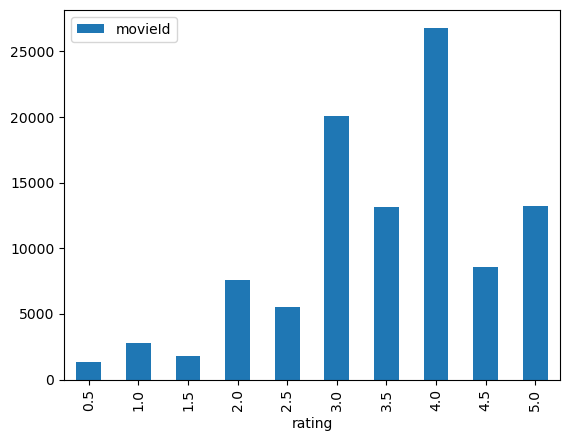

In [8]:
plot_movie_rating_distribution(df_ratings)

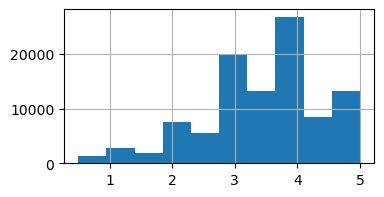

In [9]:
plot_rating_hist(df_ratings)

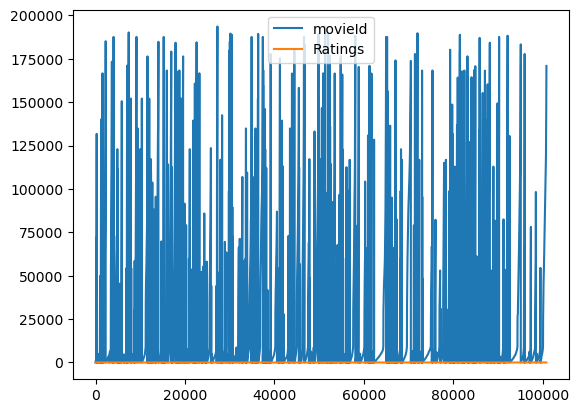

In [10]:
plot_rating_movie(df_ratings)

### GOrup by movieID and rating

In [11]:
median_rating = df_ratings.groupby('movieId')[['rating']].median()
median_rating.head()

,rating
movieId,
1,4.0
2,3.5
3,3.0
4,3.0
5,3.0


In [12]:
mean_rating = df_ratings.groupby('movieId')[['rating']].mean()
mean_rating.head()

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


### MOvies with highest and lowest ratings

In [13]:
# Lowest rated movies
lowest_rated = mean_rating['rating'].idxmin()
df_movies.loc[df_movies['movieId'] == lowest_rated]


,movieId,title,genres
2689,3604,Gypsy (1962),Musical


In [14]:
# Highest rated movies
highest_rated = mean_rating['rating'].idxmax()
df_movies.loc[df_movies['movieId'] == highest_rated]

,movieId,title,genres
48,53,Lamerica (1994),Adventure|Drama


### who rated high and low?

In [15]:
df_ratings[df_ratings['movieId']==highest_rated]


,userId,movieId,rating
13368,85,53,5.0
96115,603,53,5.0


In [16]:
df_ratings[df_ratings['movieId']==lowest_rated]

,userId,movieId,rating
13633,89,3604,0.5


In [17]:
# develop user item matrix
mat_X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_user_item_matrix(df_ratings)


## Examine the classification Result

In [18]:
movie_titles = dict(zip(df_movies['movieId'], df_movies['title']))
movie_id = 15

movie_title = movie_titles[movie_id]
movie_id,movie_title

(15, 'Cutthroat Island (1995)')

###  classify movies

In [19]:
k_class = 8
similar_ids = classify_movies(k_class,movie_id, mat_X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper)
similar_ids

[93, 340, 415, 795, 491, 276, 291, 54]

In [20]:
print("MOVIES SIMIALR TO: ",movie_title, "\n")
for i in similar_ids:
    print(movie_titles[i])

MOVIES SIMIALR TO:  Cutthroat Island (1995) 

Vampire in Brooklyn (1995)
War, The (1994)
Another Stakeout (1993)
Somebody to Love (1994)
Man Without a Face, The (1993)
Milk Money (1994)
Poison Ivy II (1996)
Big Green, The (1995)


References:
    https://towardsdatascience.com/item-based-collaborative-filtering-in-python-91f747200fab
    https://www.jillcates.com/pydata-workshop/html/tutorial.html
    https://towardsdatascience.com/various-implementations-of-collaborative-filtering-100385c6dfe0